In [604]:
%matplotlib inline


In [605]:
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import matplotlib
matplotlib.axes.Axes.bar
matplotlib.pyplot.bar
matplotlib.projections.polar

<module 'matplotlib.projections.polar' from '/anaconda3/envs/PythonData/lib/python3.6/site-packages/matplotlib/projections/polar.py'>

In [606]:
import numpy as np
import pandas as pd

In [607]:
import datetime as dt

In [608]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [609]:
database_path = "../Resources/hawaii.sqlite"

In [610]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo=False)
conn = engine.connect()

In [611]:
# DETERMINE TABLE NAMES

inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [612]:
# DETERMINE COLUMN NAMES IN MEASUREMENT

columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [613]:
# DETERMINE COLUMN NAMES IN STATION

columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [614]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [615]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [616]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [617]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [618]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [619]:
data = pd.read_sql("SELECT * FROM Measurement", conn)
data.head()

,id,station,date,prcp,tobs
0,1,USC00519397,2010-01-01,0.08,65.0
1,2,USC00519397,2010-01-02,0.00,63.0
2,3,USC00519397,2010-01-03,0.00,74.0
3,4,USC00519397,2010-01-04,0.00,76.0
4,5,USC00519397,2010-01-06,NaN,73.0


In [620]:
station_data = pd.read_sql("SELECT * FROM Station", conn)
station_data.head()

,id,station,name,latitude,longitude,elevation
0,1,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,2,USC00513117,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,4,USC00517948,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [621]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

# LAST DATE IN TABLE

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(last_date)

('2017-08-23',)


In [622]:
# FIND DATE STARTING 12 MONTHS BACK

one_year = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(one_year)

2016-08-23


In [623]:
# RUN QUERY ON PRECIP

precip = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > one_year).\
    order_by(Measurement.date).all()

In [624]:
# SEND TO DATAFRAME FOR VIEWING

precip_df = pd.DataFrame(precip)

precip_df.head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


In [688]:
numpy_array = precip_df.values
numpy_array

array([['2016-08-24', 0.08],
       ['2016-08-24', 2.15],
       ['2016-08-24', 2.28],
       ...,
       ['2017-08-23', 0.0],
       ['2017-08-23', 0.08],
       ['2017-08-23', 0.45]], dtype=object)

In [685]:
# SET MONTH AS INDEX COLUMN

precip_df.set_index("date").head()

,prcp
date,
2016-08-24,0.08
2016-08-24,2.15
2016-08-24,2.28
2016-08-24,NaN
2016-08-24,1.22


In [626]:
# SORT DATAFRAME BY DATE (hmmm...was already sorted by date)

precip_df.sort_values(by='date').head()

,date,prcp
0,2016-08-24,0.08
1,2016-08-24,2.15
2,2016-08-24,2.28
3,2016-08-24,NaN
4,2016-08-24,1.22


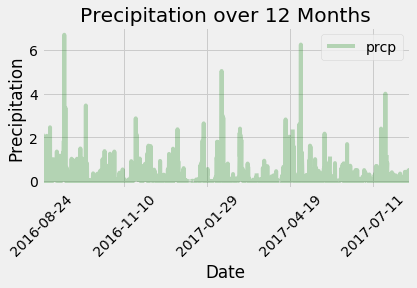

In [627]:
# Use Pandas Plotting with Matplotlib to plot the data
# Set x axis and tick locations

precip_df.plot('date', 'prcp', color="g", alpha=0.25)

plt.xticks(rotation=45)

plt.tight_layout()

plt.title("Precipitation over 12 Months")
plt.xlabel("Date")
plt.ylabel("Precipitation")

plt.show()

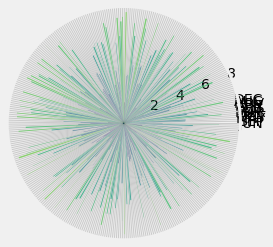

In [707]:
# (IGNORE THIS) JUST HAVING SOME FUN HERE EXPERIMENTING WITH A RADIUS BAR GRAPH

# Compute pie slices

sample = np.random.uniform(low=0.5, high=10.0, size=(12,))
N = 365
theta = np.linspace(0, 2 * np.pi, N, endpoint=False)
height = numpy_array
radii = 8 * np.random.rand(N)
width = np.pi / 200 * np.random.rand(N)
colors = plt.cm.viridis(radii / 10.)

ax = plt.subplot(111, projection='polar')
ax.bar(theta, radii, width=width, bottom=0.0, color=colors, alpha=0.75)

ax.set_xticks(theta)
ax.set_xticklabels({'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP', 'OCT', 'NOV', 'DEC'})
ax.yaxis.grid(False)

plt.show()

In [ ]:
#import matplotlib.pyplot as plt
#import numpy as np

#N = 365

#theta = precip_df

#ax = plt.subplot(111, polar=True)

#bars = ax.bar(theta, height,
              #colors = plt.cm.viridis(radii / 10.),
              #bottom=0.0,
              #alpha=0.5)

#ax.set_xticks(theta)
#ax.set_xticklabels(range(1, len(theta)+1))
#ax.yaxis.grid(True)

#plt.show()

In [629]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_df.describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [630]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(Station).count()
print(station_count)

9


In [631]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


# TOTAL STATION ACTIVITY
station_activity = session.query(Measurement.tobs).count()
print(station_activity)


19550


In [632]:
# STATION ACTIVITY IN DESCENDING ORDER

station_obs = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()
print(station_obs)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [633]:
# STATION ACTIVITY IN DESCENDING ORDER AS DATAFRAME

obs_df = pd.DataFrame(station_obs, columns=['Station', 'tobs'])

obs_df.head(10)

,Station,tobs
0,USC00519281,2772
1,USC00519397,2724
2,USC00513117,2709
3,USC00519523,2669
4,USC00516128,2612
5,USC00514830,2202
6,USC00511918,1979
7,USC00517948,1372
8,USC00518838,511


In [634]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?

temperature = session.query(Measurement.tobs).\
               order_by(Measurement.tobs).all()

print(temperature)

[(53.0,), (54.0,), (55.0,), (56.0,), (56.0,), (56.0,), (56.0,), (56.0,), (56.0,), (56.0,), (56.0,), (56.0,), (56.0,), (56.0,), (56.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (57.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (58.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (59.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), (60.0,), 

In [635]:
temp_df = pd.DataFrame(temperature)
print(temp_df)

       tobs
0      53.0
1      54.0
2      55.0
3      56.0
4      56.0
5      56.0
6      56.0
7      56.0
8      56.0
9      56.0
10     56.0
11     56.0
12     56.0
13     56.0
14     56.0
15     57.0
16     57.0
17     57.0
18     57.0
19     57.0
20     57.0
21     57.0
22     57.0
23     57.0
24     57.0
25     57.0
26     57.0
27     57.0
28     57.0
29     57.0
...     ...
19520  84.0
19521  84.0
19522  84.0
19523  84.0
19524  84.0
19525  84.0
19526  84.0
19527  84.0
19528  84.0
19529  84.0
19530  84.0
19531  85.0
19532  85.0
19533  85.0
19534  85.0
19535  85.0
19536  85.0
19537  85.0
19538  85.0
19539  85.0
19540  85.0
19541  85.0
19542  86.0
19543  86.0
19544  86.0
19545  86.0
19546  87.0
19547  87.0
19548  87.0
19549  87.0

[19550 rows x 1 columns]


In [636]:
# MINIMUM TEMPERATURE

min_temp = temp_df['tobs'].min()
print(min_temp)

53.0


In [637]:
# MAXIMUM TEMPERATURE

max_temp = temp_df['tobs'].max()
print(max_temp)

87.0


In [638]:
# AVERAGE TEMPERATURE

avg_temp = temp_df['tobs'].mean()
print(avg_temp)

73.09795396419437


In [639]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

high_station = session.query(Measurement.station, Measurement.date, Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > one_year).\
    order_by(Measurement.date).all()

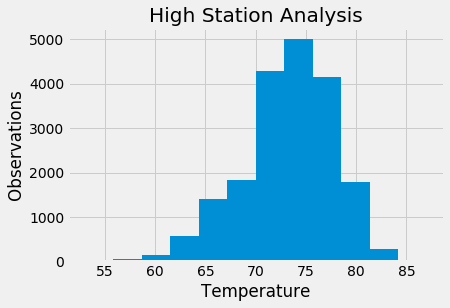

In [640]:
plt.hist(temp_df['tobs'],12)
plt.xlabel("Temperature")
plt.ylabel("Observations")
plt.title("High Station Analysis")
plt.show()

In [641]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [642]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
temp_range = (calc_temps('2017-08-23', '2017and-08-30'))
print(temp_range)

[(76.0, 80.25, 82.0)]


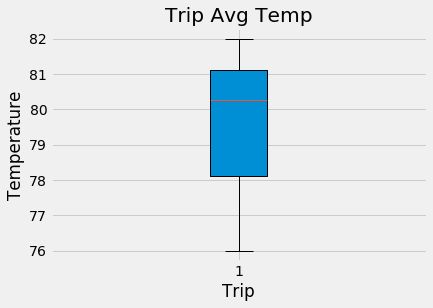

In [643]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

fig, ax = plt.subplots()
ax.boxplot(temp_range, patch_artist=True)
ax.set_title('Trip Avg Temp')
ax.set_ylabel("Temperature")
ax.set_xlabel("Trip")
plt.show()

In [644]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

# JOIN TABLES FOR CATEGORIES NEEDED

sel = [Measurement.prcp, Measurement.station, Station.name, Station.latitude, Station.longitude, Station.elevation]
precip_per_station = session.query(*sel).all()

In [645]:
columns = inspector.get_columns('sel')
for c in columns:
    print(c['name'], c["type"])

In [646]:
final_rain_df = pd.DataFrame(precip_per_station)

final_rain_df.head()

,prcp,station,name,latitude,longitude,elevation
0,0.08,USC00519397,"WAIKIKI 717.2, HI US",21.2716,-157.8168,3.0
1,0.08,USC00519397,"KANEOHE 838.1, HI US",21.4234,-157.8015,14.6
2,0.08,USC00519397,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.5213,-157.8374,7.0
3,0.08,USC00519397,"PEARL CITY, HI US",21.3934,-157.9751,11.9
4,0.08,USC00519397,"UPPER WAHIAWA 874.3, HI US",21.4992,-158.0111,306.6


In [647]:
# DATAFRAME WITH EVERYTHING DESCENDING BUT NOT SUMMED

final_rain_df.sort_values(by='prcp', ascending=False)

,prcp,station,name,latitude,longitude,elevation
60300,11.53,USC00514830,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0
60301,11.53,USC00514830,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
60302,11.53,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
60303,11.53,USC00514830,"PEARL CITY, HI US",21.39340,-157.97510,11.9
60304,11.53,USC00514830,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
60305,11.53,USC00514830,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
60306,11.53,USC00514830,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
60308,11.53,USC00514830,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
60307,11.53,USC00514830,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
131208,9.64,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9


In [648]:
rain_totals = final_rain_df.groupby("station").count()["prcp"].sort_values(ascending = False)
rain_totals

station
USC00519281    24948
USC00513117    24264
USC00519397    24165
USC00519523    23148
USC00516128    22356
USC00514830    17433
USC00511918    17388
USC00517948     6147
USC00518838     3078
Name: prcp, dtype: int64

In [649]:
rain_totals_df = pd.DataFrame(rain_totals)
rain_totals_df

,prcp
station,
USC00519281,24948
USC00513117,24264
USC00519397,24165
USC00519523,23148
USC00516128,22356
USC00514830,17433
USC00511918,17388
USC00517948,6147
USC00518838,3078


In [650]:
session.query(Station.station, 
              func.sum(Measurement.prcp), 
              Station.name, 
              Station.latitude, 
              Station.longitude, 
              Station.elevation).\
    group_by(Station.station).\
    order_by(func.sum(Measurement.prcp).desc()).all()

[('USC00511918',
  2908.1299999999706,
  'HONOLULU OBSERVATORY 702.2, HI US',
  21.3152,
  -157.9992,
  0.9),
 ('USC00513117',
  2908.1299999999706,
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6),
 ('USC00514830',
  2908.1299999999706,
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0),
 ('USC00516128',
  2908.1299999999706,
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4),
 ('USC00517948',
  2908.1299999999706,
  'PEARL CITY, HI US',
  21.3934,
  -157.9751,
  11.9),
 ('USC00518838',
  2908.1299999999706,
  'UPPER WAHIAWA 874.3, HI US',
  21.4992,
  -158.0111,
  306.6),
 ('USC00519281',
  2908.1299999999706,
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00519397',
  2908.1299999999706,
  'WAIKIKI 717.2, HI US',
  21.2716,
  -157.8168,
  3.0),
 ('USC00519523',
  2908.1299999999706,
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5)]

## Optional Challenge Assignment

In [651]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [652]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [653]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [654]:
# Plot the daily normals as an area plot with `stacked=False`
